PREPROCESSING

Read Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [142]:
# Read file dataset from CSV
data = pd.read_csv("Response Form.csv")

# Data detail
print(data.info())
print(data.describe(include='all'))
print(data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Timestamp                             445 non-null    object 
 1   Permission                            445 non-null    object 
 2   PSI                                   443 non-null    object 
 3   Nama                                  364 non-null    object 
 4   Nomor Telepon                         354 non-null    object 
 5   Umur                                  443 non-null    object 
 6   Domisili                              443 non-null    object 
 7   Gender                                443 non-null    object 
 8   Status Perkawinan                     443 non-null    object 
 9   Jumlah Tanggungan                     443 non-null    object 
 10  Profesi                               443 non-null    object 
 11  Tujuan             

Timestamp                                 0
Permission                                0
PSI                                       2
Nama                                     81
Nomor Telepon                            91
Umur                                      2
Domisili                                  2
Gender                                    2
Status Perkawinan                         2
Jumlah Tanggungan                         2
Profesi                                   2
Tujuan                                    2
Penghasilan                               2
Persentasi Tabungan dari Penghasilan      2
Rate Fungsionalitas                       2
Rate admin                                2
Rate limit                                2
Rate bunga                                2
Rate setoran awal                         2
Rate needs                                2
Other reason                            195
dtype: int64

 ---Visualization---


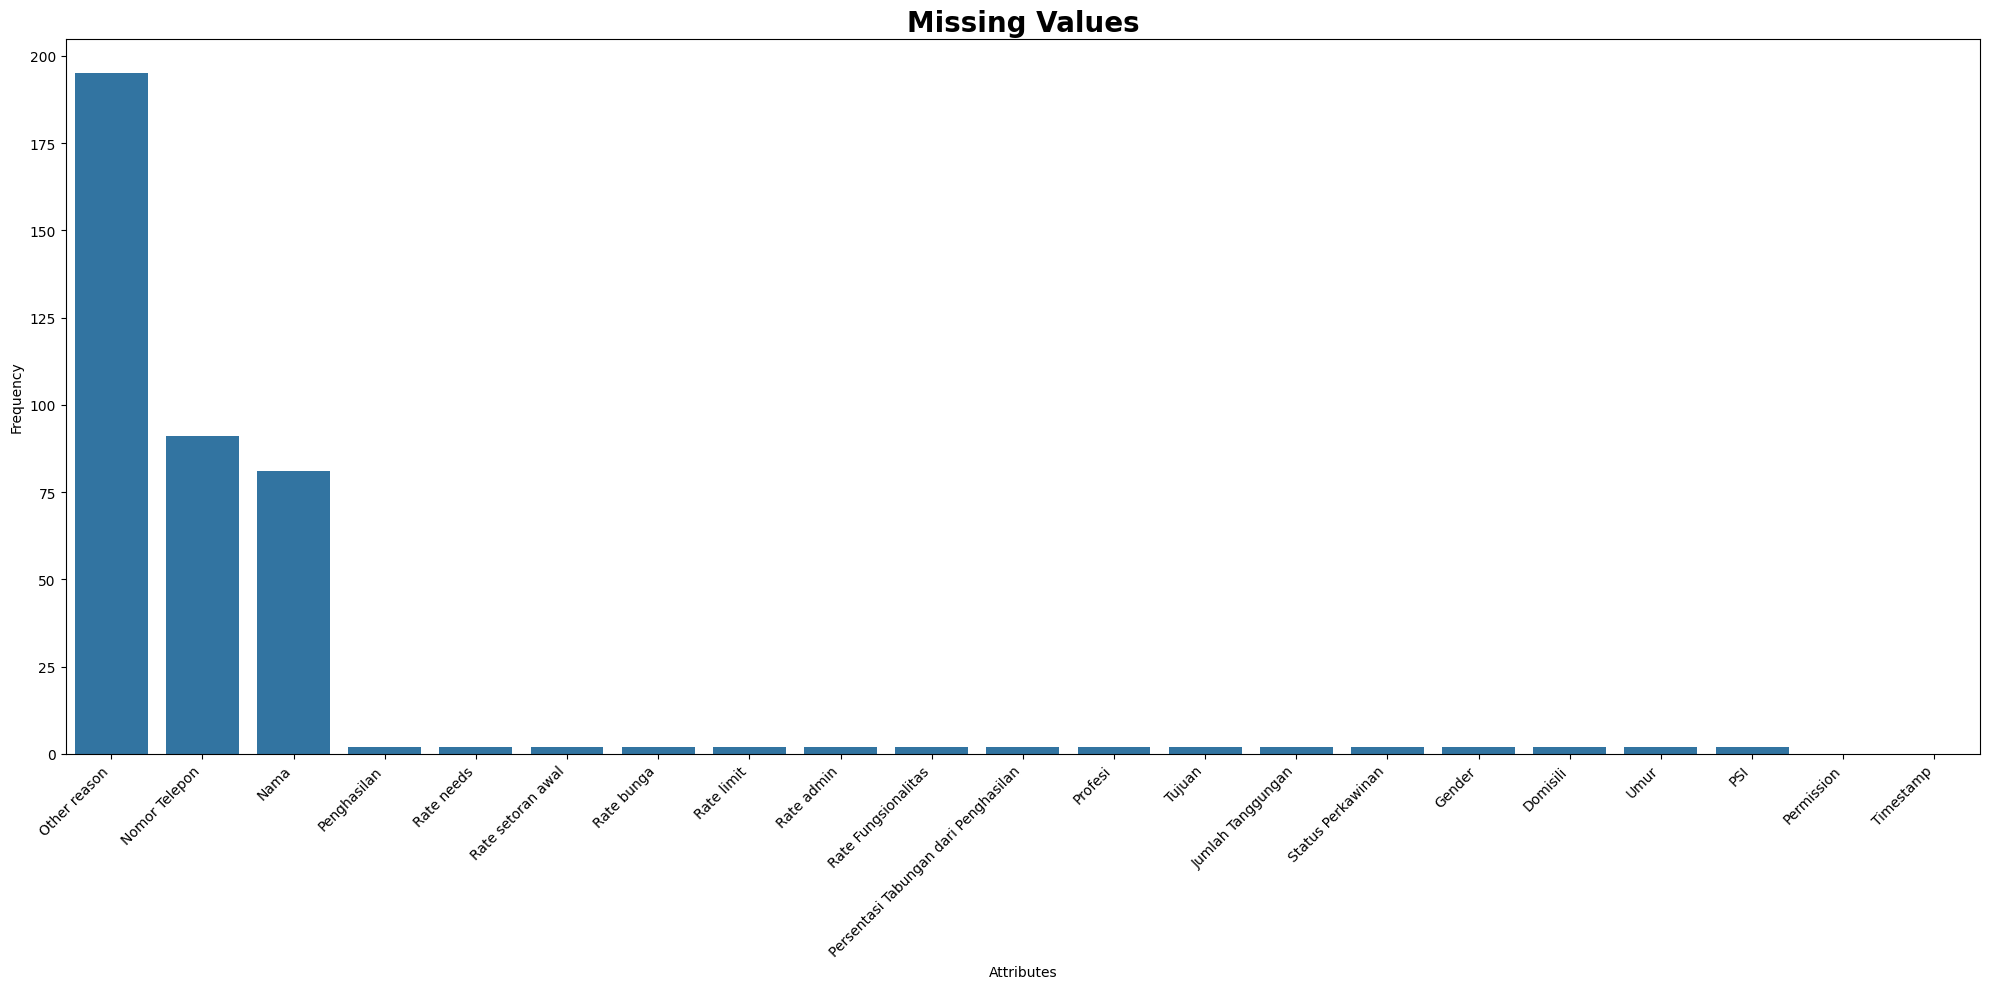

In [143]:
# Cek missing value kolom
print(data.isnull().sum())

print("\n ---Visualization---")

# DataFrame untuk menghitung missing values
missing_values = pd.DataFrame({
    'Attributes': data.columns,  # Nama kolom
    'Frequency': data.isnull().sum()  # Jumlah missing values di setiap kolom
})

# Urutkan berdasarkan jumlah missing value
missing_values = missing_values.sort_values(by='Frequency', ascending=False)

# Plot visualisasi
plt.figure(figsize=(20, 10))  # Ukuran grafik
plt.title('Missing Values', fontsize=20, fontweight='bold')  # Judul grafik

sns.barplot(
    x='Attributes',
    y='Frequency',
    data=missing_values,
    order=missing_values['Attributes']
)

# Rotasi label untuk kolom agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()  # Atur layout agar tidak terpotong
plt.show()



In [144]:
# Hapus data by label
data.dropna(subset=['PSI'], inplace=True)


# Cek missing value
print(data.isnull().sum())

Timestamp                                 0
Permission                                0
PSI                                       0
Nama                                     79
Nomor Telepon                            89
Umur                                      0
Domisili                                  0
Gender                                    0
Status Perkawinan                         0
Jumlah Tanggungan                         0
Profesi                                   0
Tujuan                                    0
Penghasilan                               0
Persentasi Tabungan dari Penghasilan      0
Rate Fungsionalitas                       0
Rate admin                                0
Rate limit                                0
Rate bunga                                0
Rate setoran awal                         0
Rate needs                                0
Other reason                            193
dtype: int64


c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\.venv\lib\site-packages\dython\nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
c:\Users\b

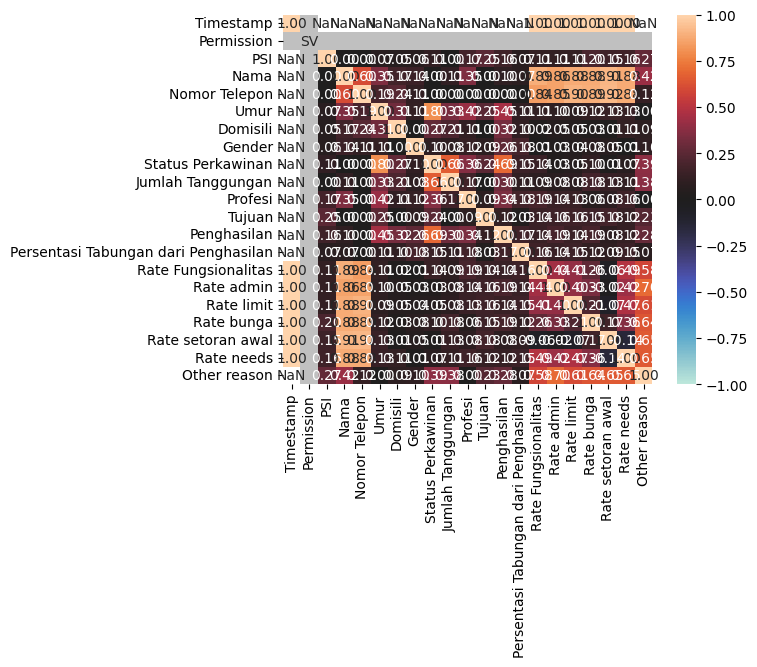

In [145]:
correlations = associations(data)
corr = correlations['corr']

In [146]:
# print value each attributes to label
print(corr['PSI'])

Timestamp                               0.000000
Permission                              0.000000
PSI                                     1.000000
Nama                                    0.000000
Nomor Telepon                           0.000000
Umur                                    0.066595
Domisili                                0.052841
Gender                                  0.058485
Status Perkawinan                       0.109228
Jumlah Tanggungan                       0.000000
Profesi                                 0.172183
Tujuan                                  0.248267
Penghasilan                             0.159157
Persentasi Tabungan dari Penghasilan    0.067259
Rate Fungsionalitas                     0.110639
Rate admin                              0.109852
Rate limit                              0.110832
Rate bunga                              0.200952
Rate setoran awal                       0.153848
Rate needs                              0.163458
Other reason        

Remove attribute by correlation

In [147]:
# remove where value < 0.5

irrelevant_attributes = corr['PSI'][corr['PSI'] < 0.05].keys()
print(irrelevant_attributes)

# Hapus kolom dengan korelasi < 0.005
data.drop(columns=irrelevant_attributes, inplace=True)
data = data[data['PSI'] != 'Tabungan Valas']

print(data.head(0))

Index(['Timestamp', 'Permission', 'Nama', 'Nomor Telepon',
       'Jumlah Tanggungan'],
      dtype='object')
Empty DataFrame
Columns: [PSI, Umur, Domisili, Gender, Status Perkawinan, Profesi, Tujuan, Penghasilan, Persentasi Tabungan dari Penghasilan, Rate Fungsionalitas, Rate admin, Rate limit, Rate bunga, Rate setoran awal, Rate needs, Other reason]
Index: []


In [148]:
df_targets = data['PSI'].unique()
print(df_targets)

['Tabungan Anak Muda' 'Tabungan Regular' 'Tabungan Premium'
 'Tabungan Medium' 'Tabungan Online' 'TabunganKu' 'Tabungan Berjangka'
 'Tabungan Pelajar']


One Hot Encoding Transform

In [149]:
label_encoder = preprocessing.LabelEncoder() 

data['PSI'] = label_encoder.fit_transform(data['PSI'])
data['PSI'].unique()
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Target Label Encoding Mapping:", label_mapping)

data['Umur'] = label_encoder.fit_transform(data['Umur'])
data['Umur'].unique()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

data['Status Perkawinan'] = label_encoder.fit_transform(data['Status Perkawinan'])
data['Status Perkawinan'].unique()

data['Domisili'] = label_encoder.fit_transform(data['Domisili'])
data['Domisili'].unique()  

data['Profesi'] = label_encoder.fit_transform(data['Profesi'])
data['Profesi'].unique()

data['Tujuan'] = label_encoder.fit_transform(data['Tujuan'])
data['Tujuan'].unique()

data['Penghasilan'] = label_encoder.fit_transform(data['Penghasilan'])
data['Penghasilan'].unique()

data['Persentasi Tabungan dari Penghasilan'] = label_encoder.fit_transform(data['Persentasi Tabungan dari Penghasilan'])
data['Persentasi Tabungan dari Penghasilan'].unique()

data['Other reason'] = label_encoder.fit_transform(data['Other reason'])
data['Other reason'].unique()

print(data)

Target Label Encoding Mapping: {'Tabungan Anak Muda': 0, 'Tabungan Berjangka': 1, 'Tabungan Medium': 2, 'Tabungan Online': 3, 'Tabungan Pelajar': 4, 'Tabungan Premium': 5, 'Tabungan Regular': 6, 'TabunganKu': 7}
     PSI  Umur  Domisili  Gender  Status Perkawinan  Profesi  Tujuan  \
0      0     2         0       1                  0        0       9   
1      6     1         0       0                  0        2       5   
2      6     2         0       0                  0        0       5   
3      6     1         0       0                  0        2       2   
4      6     3         0       0                  1        0       5   
..   ...   ...       ...     ...                ...      ...     ...   
440    0     1         1       0                  0        2       3   
441    6     2         0       0                  0        0       3   
442    0     2         0       0                  0        1       5   
443    6     2         0       1                  0        0       5

Oversampling

Oversampling (with number stated)

In [150]:
## First try ##
# Upsampling Tabunganku, Tabungan Pelajar, Tabungan Berjangka, Tabungan Medium, Tabungan Premium
# hanya upsampling data-data yang jumlahnya di bawah 50 aja, hasil akurasi 74.6% namun menurut gpt
# overfitting sebab akurasi training data > testing data

## Second try ##
# melakukan yg dilakukan 1st try
# tambah downsampling data yg > 100, akurasi 69.23%

## Third try ##
# melakukan first try, namun data di up sampling hingga 100 data
# akurasi 83,87% dengan confusion matrix sbg berikut


# Menampilkan jumlah record per kelas sebelum oversampling
print("Jumlah record per kelas sebelum resampling:")
print(data['PSI'].value_counts())

# Membuat list untuk menampung DataFrame hasil upsampling
resampled_dfs = []

# Melakukan upsampling hanya pada kelas yang memiliki jumlah kurang dari 50
for class_label in data['PSI'].unique():
    class_data = data[data['PSI'] == class_label]
    
    # Cek jika jumlah data pada kelas kurang dari 50
    if len(class_data) < 50:
        class_data_upsampled = resample(class_data,
                                        replace=True,  # Sampling dengan penggantian
                                        n_samples=100,  # Mengambil sampel sampai mencapai 50
                                        random_state=42)  # Untuk hasil yang konsisten
        resampled_dfs.append(class_data_upsampled)
    else:
        # resampled_dfs.append(class_data)
        if len(class_data) > 100:
            class_data_downsampled = resample(class_data,
                                        replace=True,  # Sampling dengan penggantian
                                        n_samples=100,  # Mengambil sampel sampai mencapai 50
                                        random_state=42)  # Untuk hasil yang konsisten
            resampled_dfs.append(class_data_downsampled)
        # Jika jumlah data sudah cukup (>= 50), masukkan data aslinya
        else:
            resampled_dfs.append(class_data)

# Gabungkan kembali semua kelas yang sudah diupsample
data = pd.concat(resampled_dfs)

# Menampilkan jumlah record per kelas setelah oversampling
print("\nJumlah record per kelas setelah resampling:")
print(data['PSI'].value_counts())

# Menampilkan DataFrame yang sudah diupsample
print("\nDataFrame setelah resampling:")
print(data)



Jumlah record per kelas sebelum resampling:
PSI
6    274
0     54
3     40
7     18
1     18
2     14
4     12
5     10
Name: count, dtype: int64

Jumlah record per kelas setelah resampling:
PSI
6    100
5    100
2    100
3    100
7    100
1    100
4    100
0     54
Name: count, dtype: int64

DataFrame setelah resampling:
     PSI  Umur  Domisili  Gender  Status Perkawinan  Profesi  Tujuan  \
0      0     2         0       1                  0        0       9   
6      0     1         0       1                  0        2       5   
46     0     1         1       0                  0        2       3   
49     0     1         0       0                  0        2       3   
57     0     1         1       1                  0        2       5   
..   ...   ...       ...     ...                ...      ...     ...   
438    4     1         0       1                  0        2       8   
438    4     1         0       1                  0        2       8   
438    4     1         0    

Oversampling (without number stated; random)

In [97]:
# ini upsampling semua data hingga jumlah masing-masing 220 record data, dapet akurasi 95.42% tp kemungkinan besar overfitting

# Misalkan data sudah ada dalam variabel 'data' yang berisi fitur dan target 'PSI'
X = data.drop('PSI', axis=1).values  # Customer attributes
y = data['PSI'].values  # Target variable (savings product)

# Cek distribusi kelas sebelum oversampling
print("Distribusi kelas sebelum oversampling:", Counter(y))

# Membagi data menjadi train dan test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan RandomOverSampler untuk oversampling pada data latih
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah oversampling
print("Distribusi kelas setelah oversampling:", Counter(y))

Distribusi kelas sebelum oversampling: Counter({6: 274, 0: 54, 3: 40, 7: 18, 1: 18, 2: 14, 4: 12, 5: 10})
Distribusi kelas setelah oversampling: Counter({0: 220, 6: 220, 3: 220, 5: 220, 1: 220, 2: 220, 7: 220, 4: 220})


SMOTE

In [122]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah oversampling
print("Distribusi kelas setelah oversampling:", Counter(y))

Distribusi kelas setelah oversampling: Counter({2: 189, 0: 189, 7: 189, 6: 189, 3: 189, 4: 189, 5: 189, 1: 189})


Drop other reason column

In [137]:
attr_data = data
attr_data.drop(columns=['Other reason'], inplace=True)
encoder = OneHotEncoder(sparse=False)

categorical_columns = attr_data.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded = encoder.fit_transform(attr_data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

attr_data = attr_data.reset_index(drop=True)
one_hot_df = one_hot_df.reset_index(drop=True)
df_encoded = pd.concat([attr_data, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

print(df_encoded)


     PSI  Umur  Domisili  Gender  Status Perkawinan  Profesi  Tujuan  \
0      0     2         0       1                  0        0       9   
1      0     1         0       1                  0        2       5   
2      0     1         1       0                  0        2       3   
3      0     1         0       0                  0        2       3   
4      0     1         1       1                  0        2       5   
..   ...   ...       ...     ...                ...      ...     ...   
923    4     1         0       1                  0        2       8   
924    4     1         0       1                  0        2       8   
925    4     1         0       1                  0        2       8   
926    4     1         1       1                  0        2       9   
927    4     1         0       1                  0        2       9   

     Penghasilan  Persentasi Tabungan dari Penghasilan  Rate Fungsionalitas  \
0              3                                     3  

c:\Users\bcamaster\OneDrive - Bina Nusantara\Documents\dinda's doc\SKRIPSI\Model\psing-model\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MODEL TESTING

ANN

In [151]:

# # Features (attributes) and target (savings product)
X = data.drop('PSI', axis=1).values  # Customer attributes
y = data['PSI'].values  # Target variable (savings product)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the target labels to one-hot encoding
y_encoded = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build the Artificial Neural Network (ANN)
model = Sequential()

# Add input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add output layer with softmax for classification
model.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Model Accuracy: {accuracy*100:.2f}%')

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions back to the class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels back from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate additional metrics
accuracy = accuracy_score(y_test_labels, predicted_classes)
precision = precision_score(y_test_labels, predicted_classes, average='weighted')  # Weighted average for imbalanced classes
recall = recall_score(y_test_labels, predicted_classes, average='weighted')
f1 = f1_score(y_test_labels, predicted_classes, average='weighted')

# Print out the evaluation metrics
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions back to the class labels
predicted_classes = np.argmax(predictions, axis=1)

# Map numerical class labels back to the original savings product
product_mapping = {0: 'Tabungan Anak Muda', 1: 'Tabungan Berjangka', 2: 'Tabungan Medium', 3: 'Tabungan Online', 4: 'Tabungan Pelajar', 5: 'Tabungan Premium', 6: 'Tabungan Regular', 7: 'TabunganKu'}
predicted_products = [product_mapping[class_idx] for class_idx in predicted_classes]

print("Predicted Savings Products for Test Data:", predicted_products)

# Menghitung confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)

TN = cm[0, 0]  # True Negative: Kelas 0 diprediksi benar sebagai kelas 0
FP = cm[0, 1]  # False Positive: Kelas 0 diprediksi sebagai kelas 1
FN = cm[1, 0]  # False Negative: Kelas 1 diprediksi sebagai kelas 0
TP = cm[1, 1]  # True Positive: Kelas 1 diprediksi benar sebagai kelas 1

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Epoch 1/100
76/76 [==============================] - 1s 4ms/step - loss: 1.9345 - accuracy: 0.2852 - val_loss: 1.7798 - val_accuracy: 0.3709
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 1.5318 - accuracy: 0.4992 - val_loss: 1.4368 - val_accuracy: 0.4901
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 1.1708 - accuracy: 0.6434 - val_loss: 1.1855 - val_accuracy: 0.5960
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.7380 - val_loss: 1.0083 - val_accuracy: 0.6755
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.7977 - val_loss: 0.8464 - val_accuracy: 0.7285
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.8624 - val_loss: 0.7369 - val_accuracy: 0.7483
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8789 - val_loss: 0.6974 - val_accuracy: 0.7881
Epoch 8/100
7

KNN

In [153]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['PSI'])  # Fitur
y = data['PSI']  # Label/Kelas

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur (penting untuk KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model KNN dengan jumlah tetangga tertentu (misalnya k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan data training
knn.fit(X_train_scaled, y_train)

# Prediksi dengan data test
y_pred = knn.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')

# Menghitung precision, recall, dan F1-score secara manual untuk setiap kelas
precision = precision_score(y_test, y_pred, average='weighted')  # average='weighted' untuk menangani ketidakseimbangan kelas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1-Score (Weighted): {f1:.2f}')

# Laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]  # True Negative: Kelas 0 diprediksi benar sebagai kelas 0
FP = cm[0, 1]  # False Positive: Kelas 0 diprediksi sebagai kelas 1
FN = cm[1, 0]  # False Negative: Kelas 1 diprediksi sebagai kelas 0
TP = cm[1, 1]  # True Positive: Kelas 1 diprediksi benar sebagai kelas 1

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Akurasi Model: 0.7357
Precision (Weighted): 0.72
Recall (Weighted): 0.74
F1-Score (Weighted): 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.24      0.28        17
           1       0.83      0.83      0.83        30
           2       0.80      0.94      0.86        34
           3       0.68      0.62      0.65        37
           4       0.81      1.00      0.90        26
           5       0.82      1.00      0.90        27
           6       0.68      0.34      0.46        38
           7       0.63      0.94      0.76        18

    accuracy                           0.74       227
   macro avg       0.70      0.74      0.70       227
weighted avg       0.72      0.74      0.71       227


Confusion Matrix:
[[ 4  1  0  3  0  2  3  4]
 [ 2 25  0  2  0  1  0  0]
 [ 0  0 32  0  0  0  2  0]
 [ 4  0  5 23  1  1  1  2]
 [ 0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 2  4  2  6  5  2 13  4]
 [ 0  0  1  0  0  

Random Forest

In [140]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['PSI'])  # Fitur
y = data['PSI']  # Label/Kelas

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur (penting untuk beberapa model, tetapi Random Forest tidak terlalu sensitif terhadap skala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Random Forest dengan jumlah estimators (tree) tertentu
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data training
rf.fit(X_train_scaled, y_train)

# Prediksi dengan data test
y_pred = rf.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')

# Menghitung precision, recall, dan F1-score secara manual untuk setiap kelas
precision = precision_score(y_test, y_pred, average='weighted')  # average='weighted' untuk menangani ketidakseimbangan kelas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1-Score (Weighted): {f1:.2f}')


# Laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]  # True Negative: Kelas 0 diprediksi benar sebagai kelas 0
FP = cm[0, 1]  # False Positive: Kelas 0 diprediksi sebagai kelas 1
FN = cm[1, 0]  # False Negative: Kelas 1 diprediksi sebagai kelas 0
TP = cm[1, 1]  # True Positive: Kelas 1 diprediksi benar sebagai kelas 1

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Akurasi Model: 0.8817
Precision (Weighted): 0.87
Recall (Weighted): 0.88
F1-Score (Weighted): 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.94      1.00      0.97        29
           2       0.94      1.00      0.97        29
           3       0.83      0.67      0.74        36
           4       1.00      1.00      1.00        28
           5       0.97      1.00      0.99        33
           6       0.82      0.86      0.84        86
           7       0.86      1.00      0.93        25

    accuracy                           0.88       279
   macro avg       0.87      0.85      0.85       279
weighted avg       0.87      0.88      0.87       279


Confusion Matrix:
[[ 4  0  0  1  0  1  6  1]
 [ 0 29  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0]
 [ 0  1  0 24  0  0 10  1]
 [ 0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0 33  0  0]
 [ 3  1  2  4  0  0 74  2]
 [ 0  0  0  0  0  

XGBoost

In [141]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['PSI'])  # Fitur
y = data['PSI']  # Label/Kelas

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur (XGBoost tidak terlalu terpengaruh oleh skala, tetapi bisa membantu untuk stabilitas model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mengonversi label menjadi format numerik
y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes

# Inisialisasi model XGBoost untuk klasifikasi multikelas
model = xgb.XGBClassifier(
    n_estimators=100,        # Jumlah pohon
    max_depth=6,              # Kedalaman maksimum pohon
    learning_rate=0.1,       # Learning rate
    objective='multi:softmax',# Untuk klasifikasi multikelas
    num_class=len(y.unique()),# Jumlah kelas
    random_state=42
)

# Latih model dengan data training
model.fit(X_train_scaled, y_train)

# Prediksi dengan data test
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')

# Menghitung precision, recall, dan F1-score secara manual untuk setiap kelas
precision = precision_score(y_test, y_pred, average='weighted')  # average='weighted' untuk menangani ketidakseimbangan kelas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1-Score (Weighted): {f1:.2f}')

# Laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]  # True Negative: Kelas 0 diprediksi benar sebagai kelas 0
FP = cm[0, 1]  # False Positive: Kelas 0 diprediksi sebagai kelas 1
FN = cm[1, 0]  # False Negative: Kelas 1 diprediksi sebagai kelas 0
TP = cm[1, 1]  # True Positive: Kelas 1 diprediksi benar sebagai kelas 1

print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


Akurasi Model: 0.8459
Precision (Weighted): 0.84
Recall (Weighted): 0.85
F1-Score (Weighted): 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.31      0.42        13
           1       0.85      1.00      0.92        29
           2       0.85      1.00      0.92        29
           3       0.75      0.67      0.71        36
           4       1.00      1.00      1.00        28
           5       0.94      1.00      0.97        33
           6       0.80      0.74      0.77        86
           7       0.83      1.00      0.91        25

    accuracy                           0.85       279
   macro avg       0.84      0.84      0.83       279
weighted avg       0.84      0.85      0.84       279


Confusion Matrix:
[[ 4  0  1  1  0  0  7  0]
 [ 0 29  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0]
 [ 0  2  0 24  0  0  9  1]
 [ 0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0 33  0  0]
 [ 2  3  4  7  0  2 64  4]
 [ 0  0  0  0  0  

SUMMARY WITH CONFUSION MATRIX

In [15]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions back to the class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to class labels

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=product_mapping.values(), yticklabels=product_mapping.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Loop to calculate TP, FP, TN, FN for each class
n_classes = cm.shape[0]  # Number of classes
conf_matrix_data = []

for i in range(n_classes):
    TP = cm[i, i]  # True Positive
    FP = cm[:, i].sum() - TP  # False Positive (sum of the column minus TP)
    FN = cm[i, :].sum() - TP  # False Negative (sum of the row minus TP)
    TN = cm.sum() - (TP + FP + FN)  # True Negative (total sum minus TP, FP, FN)
    
    conf_matrix_data.append([TP, FP, TN, FN])

# Convert the confusion matrix data into a DataFrame for easy display
conf_matrix_df = pd.DataFrame(conf_matrix_data, columns=['True Positive (TP)', 'False Positive (FP)', 'True Negative (TN)', 'False Negative (FN)'])

# Display the confusion matrix table
print("\nConfusion Matrix Table (TP, FP, TN, FN):")
print(conf_matrix_df)

NameError: name 'model' is not defined